In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

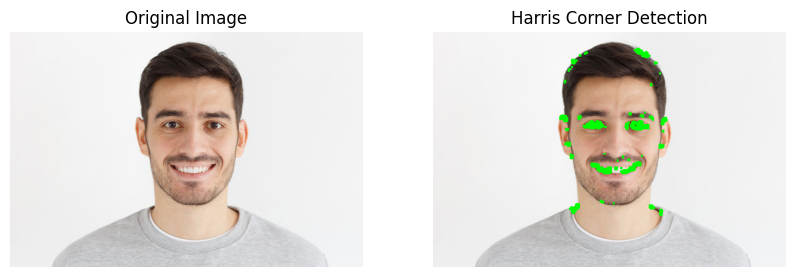

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\abhir\Downloads\image1.jpg"  # Update with your image path
image = cv2.imread(image_path)

# Copy the image
image_copy = image.copy()

# Convert to grayscale
grayed_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
grayed_image = np.float32(grayed_image)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(grayed_image, blockSize=5, ksize=3, k=0.04)

# Dilate to mark the corners
dst = cv2.dilate(dst, None)

# Highlight corners in green
image_copy[dst > 0.01 * dst.max()] = [0, 255, 0]

# Plot original and corner-detected images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image[..., ::-1])  # Convert BGR to RGB for correct display
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_copy[..., ::-1])  # Convert BGR to RGB
plt.title('Harris Corner Detection')
plt.axis('off')

plt.show()


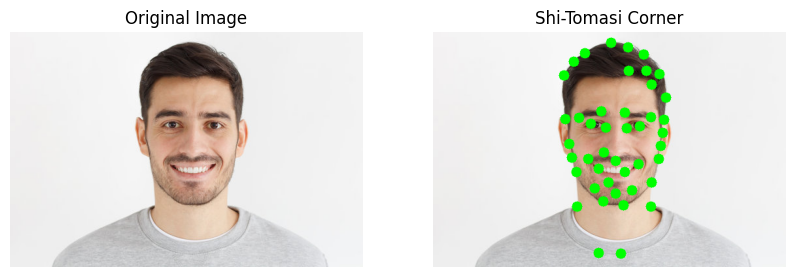

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\abhir\Downloads\image1.jpg"  # Update with your image path
image = cv2.imread(image_path)

# Make a copy for corner detection
corner_image = image.copy()

# Convert to grayscale
gray_image = cv2.cvtColor(corner_image, cv2.COLOR_BGR2GRAY)

# Apply Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=50, qualityLevel=0.02, minDistance=20)
corners = np.float32(corners)

# Draw detected corners on the image
for item in corners:
    x, y = item[0]
    cv2.circle(corner_image, (int(x), int(y)), 8, (0, 255, 0), -1)

# Display the original and the corner-detected images side by side
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image[..., ::-1])  # Convert BGR to RGB
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(corner_image[..., ::-1])
plt.title('Shi-Tomasi Corner')
plt.axis('off')

plt.show()


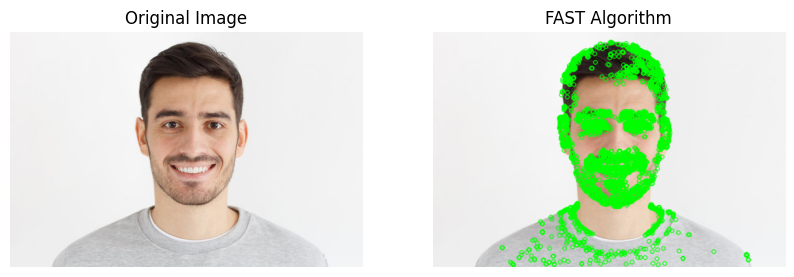

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\abhir\Downloads\image1.jpg"  # Update with your image path
image = cv2.imread(image_path)

# Make a copy for FAST algorithm
fast_image = image.copy()

# Convert to grayscale
gray_image = cv2.cvtColor(fast_image, cv2.COLOR_BGR2GRAY)

# Create a FAST feature detector object
fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)  # Disable non-max suppression for more keypoints

# Detect keypoints
keypoints = fast.detect(gray_image, None)

# Draw keypoints on the image
kp_image = cv2.drawKeypoints(fast_image, keypoints, None, color=(0, 255, 0))

# Display the original and FAST keypoint-detected images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image[..., ::-1])  # Convert BGR to RGB
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(kp_image[..., ::-1])
plt.title('FAST Algorithm')
plt.axis('off')

plt.show()


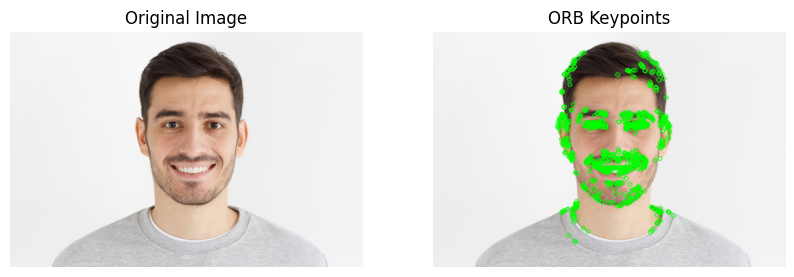

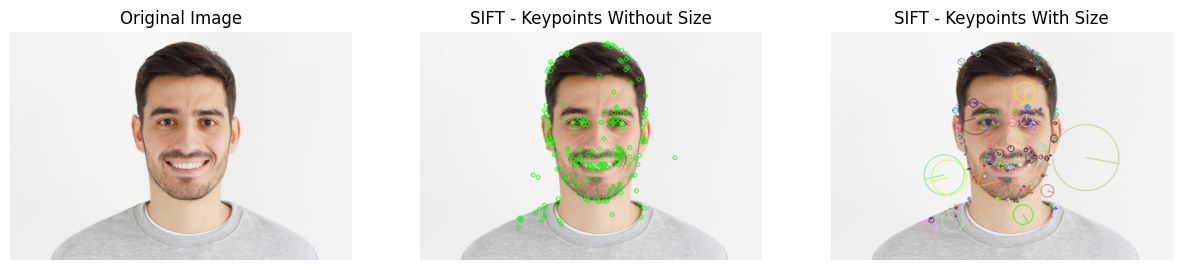

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\abhir\Downloads\image1.jpg"  # Update with your image path
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create(nfeatures=2000)
kp_orb, des_orb = orb.detectAndCompute(gray_image, None)

# Draw ORB keypoints
kp_image_orb = cv2.drawKeypoints(image, kp_orb, None, color=(0, 255, 0), flags=0)

# SIFT (Scale-Invariant Feature Transform)
sift = cv2.SIFT_create()
kp_sift, des_sift = sift.detectAndCompute(gray_image, None)

# Create copies for keypoints visualization
keypoints_without_size = np.copy(image)
keypoints_with_size = np.copy(image)

# Draw SIFT keypoints
cv2.drawKeypoints(image, kp_sift, keypoints_without_size, color=(0, 255, 0))
cv2.drawKeypoints(image, kp_sift, keypoints_with_size, 
                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display ORB keypoints
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image[..., ::-1])  # Convert BGR to RGB
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(kp_image_orb[..., ::-1])
plt.title('ORB Keypoints')
plt.axis('off')

plt.show()

# Display SIFT keypoints
plt.figure(figsize=(15, 8))
plt.subplot(131)
plt.imshow(image[..., ::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(keypoints_without_size[..., ::-1])
plt.title('SIFT - Keypoints Without Size')
plt.axis('off')

plt.subplot(133)
plt.imshow(keypoints_with_size[..., ::-1])
plt.title('SIFT - Keypoints With Size')
plt.axis('off')

plt.show()


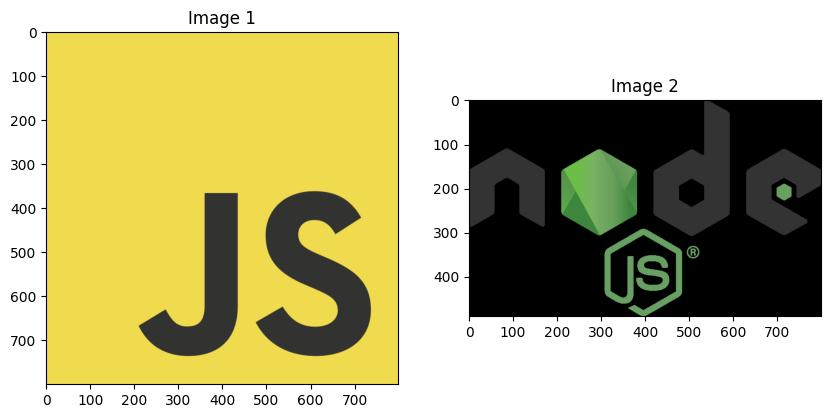

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load images
image1_path = r"C:\Users\abhir\Downloads\JavaScript-logo1.png"  # Update with correct path
image2_path = r"C:\Users\abhir\Downloads\Node.js_logo.svg.png"  # Update with correct path

img1 = cv2.imread(image1_path)
img2 = cv2.imread(image2_path)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img1[..., ::-1])  # Convert BGR to RGB for display
plt.title('Image 1')

plt.subplot(122)
plt.imshow(img2[..., ::-1])
plt.title('Image 2')

plt.show()


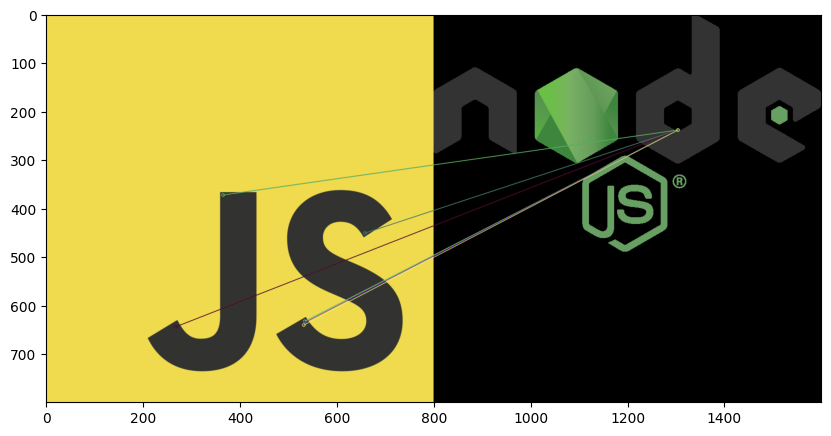


 Number of Matching keypoints between the Training and Query Images:  23


In [12]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

keypoints_without_size = np.copy(img1)
keypoints_with_size = np.copy(img1)

cv2.drawKeypoints(img1, kp1, keypoints_without_size, color=(0,255,0))
cv2.drawKeypoints(img1, kp1, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

matches = bf.match(des1, des2)

matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10,10))
plt.imshow(img3[...,::-1])
plt.show()
print("\n Number of Matching keypoints between the Training and Query Images: ", len(matches))

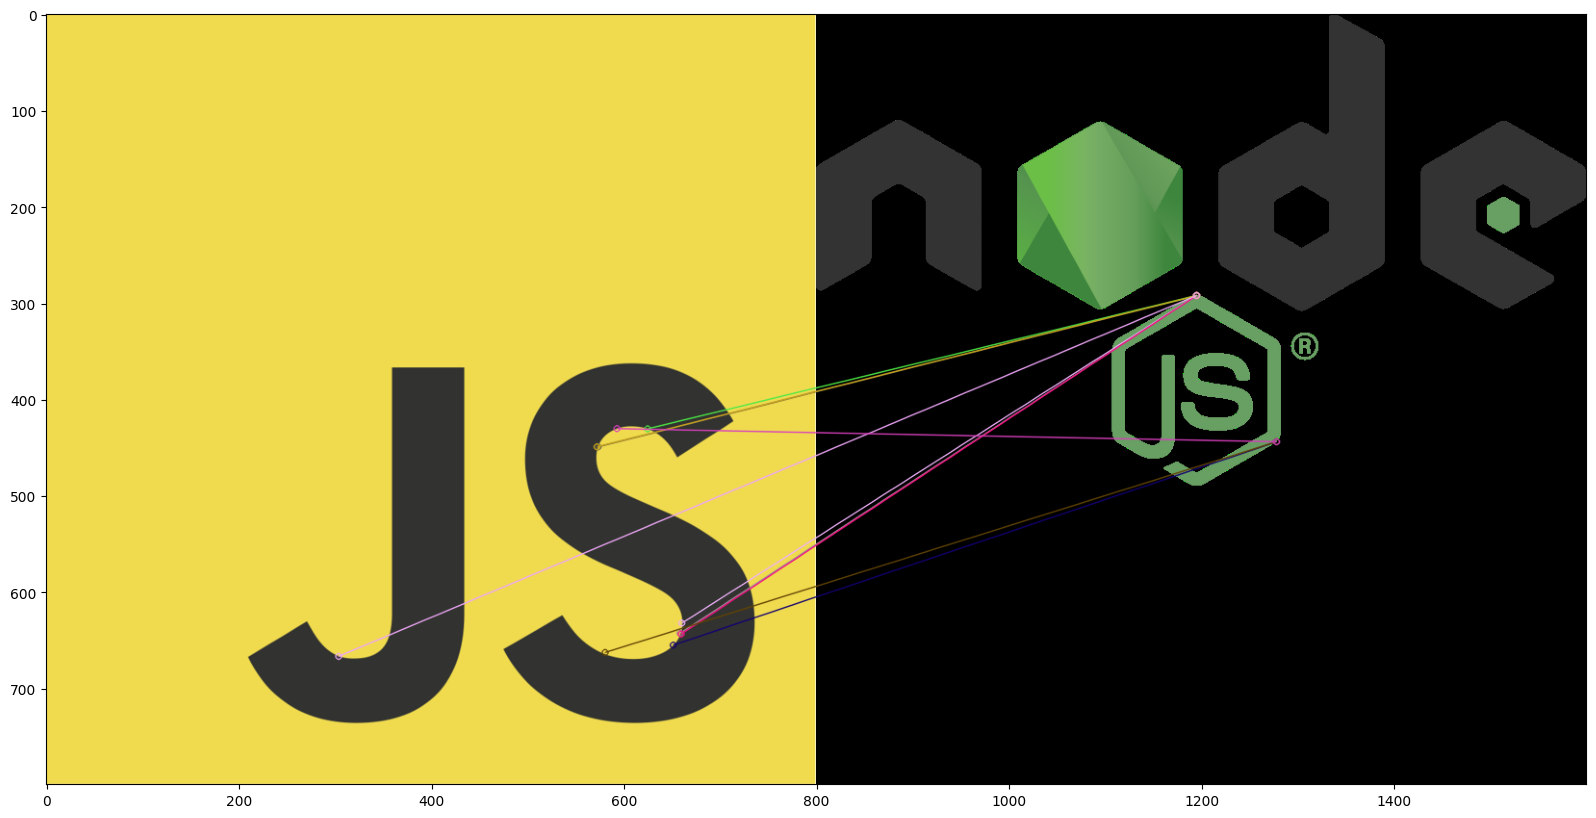


 Number of Matching keypoints between the Training and Query Images:  129


In [13]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck= False)

matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,10))
plt.imshow(img3[...,::-1])
plt.show()
print("\n Number of Matching keypoints between the Training and Query Images: ", len(matches))